# Python for Data Science: concat, cut, qcut, apply, melt, stack, crosstab

##concat

In [ ]:
#@title india weather dataframe
import pandas as pd

india_weather = pd.DataFrame({
    "city": ["mumbai","delhi","banglore"],
    "temperature": [32,45,30],
    "humidity": [80, 60, 78]
})

display(india_weather)

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78


In [ ]:
#@title us weather dataframe
us_weather = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "temperature": [21,14,35],
    "humidity": [68, 65, 75]
})

display(us_weather)

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [ ]:
#@title concat (add the two dataframes)
df = pd.concat([india_weather, us_weather])
df

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [ ]:
#@title concat (with ignore index)
df2 = india_weather + us_weather
display(df)

df1 = pd.concat([india_weather, us_weather], ignore_index=True)
display(df1)



,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78
3,new york,21,68
4,chicago,14,65
5,orlando,35,75


In [ ]:
#@title concat with keys (identifying the source)
df = pd.concat([india_weather, us_weather], keys=["india", "us"])
display(df)
display(df.iloc[2])
#display(india_weather[0])
# Question: How to explore hierarchical indexes?

city  temperature  humidity
india 0    mumbai           32        80
      1     delhi           45        60
      2  banglore           30        78
us    0  new york           21        68
      1   chicago           14        65
      2   orlando           35        75

,india
,2
city,banglore
temperature,30
humidity,78


In [ ]:
#@title locating the key
us_df = df.loc["us"]
display(us_df)

india_df = df.loc["india"]
display(india_df)


,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78


In [ ]:
#@title concat by index (concat by columns) (vertical join)

temperature_df = pd.DataFrame({
    "city": ["mumbai","delhi","banglore"],
    "temperature": [32,45,30],
}, index=[0,1,2])

display(temperature_df)

windspeed_df = pd.DataFrame({
    "city": ["delhi","mumbai"],
    "windspeed": [7,12],
}, index=[1,0])
display(windspeed_df)

df = pd.concat([temperature_df,windspeed_df], axis=1)
display(df)


,city,temperature
0,mumbai,32
1,delhi,45
2,banglore,30


,city,windspeed
1,delhi,7
0,mumbai,12


,city,temperature,city,windspeed
0,mumbai,32,mumbai,12.0
1,delhi,45,delhi,7.0
2,banglore,30,NaN,NaN


In [ ]:
#@title concat a Series (column) to a dataframe
print("Original")
display(temperature_df)

humidity_series = pd.Series(["Humid","Dry","Rain"], name="humidity")
display(humidity_series)


df = pd.concat([temperature_df, humidity_series],axis=1)
display(df)



Original


,city,temperature
0,mumbai,32
1,delhi,45
2,banglore,30


,humidity
0,Humid
1,Dry
2,Rain


,city,temperature,humidity
0,mumbai,32,Humid
1,delhi,45,Dry
2,banglore,30,Rain


##merge
Please see 7_pandas_merge_tutorial.ipynb

In [ ]:
#@title joins (inner, outer, natural)

## pd.cut and pd.qcut
Both pd.cut and pd.qcut are used to bin continuous data into discrete intervals. However, they differ in how they create these bins:

pd.cut: Bins data into equal-width intervals based on the range of the data.

pd.qcut: Bins data into intervals based on quantiles, ensuring each bin has approximately the same number of observations.

Below is a comprehensive example demonstrating how to use both pd.cut and pd.qcut in practice.

In [ ]:
#@title pd.cut
import pandas as pd

# Sample data
data = [39, 36,38, 37, 23, 37, 2, 5, 8, 10, 15, 18, 20, 25, 30, 35]
df = pd.DataFrame({'values': data})
print("Original Dataframe")
display(df)


# Using pd.cut() to create bins
df['cut_bins'] = pd.cut(df['values'], bins=[0, 10, 20, 30, 40], labels=['Low', 'Medium', 'High', 'Very High'])

display(df)

#What is the frequency of different labels?
counts = df['cut_bins'].value_counts()
print(counts)

Original Dataframe


,values
0,39
1,36
2,38
3,37
4,23
5,37
6,2
7,5
8,8
9,10


,values,cut_bins
0,39,Very High
1,36,Very High
2,38,Very High
3,37,Very High
4,23,High
5,37,Very High
6,2,Low
7,5,Low
8,8,Low
9,10,Low


cut_bins
Very High    6
Low          4
Medium       3
High         3
Name: count, dtype: int64


<class 'pandas.core.series.Series'>


<Axes: xlabel='cut_bins'>

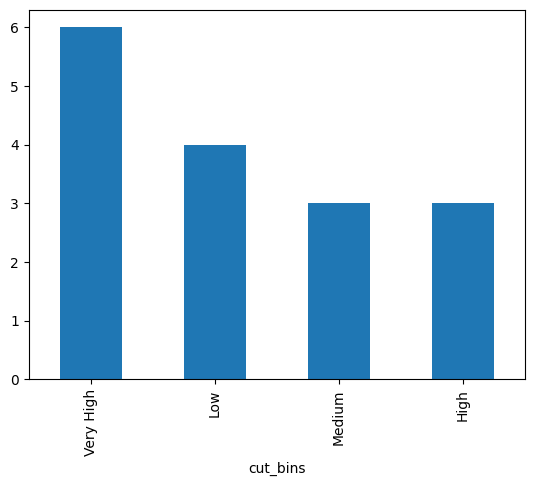

In [ ]:
#@title pd.cut visualization (unsorted)
# Using Pandas built-in plot for visualization
counts = df['cut_bins'].value_counts()
print(type(counts))
counts.plot(kind='bar')

<class 'pandas.core.series.Series'>


<Axes: xlabel='cut_bins'>

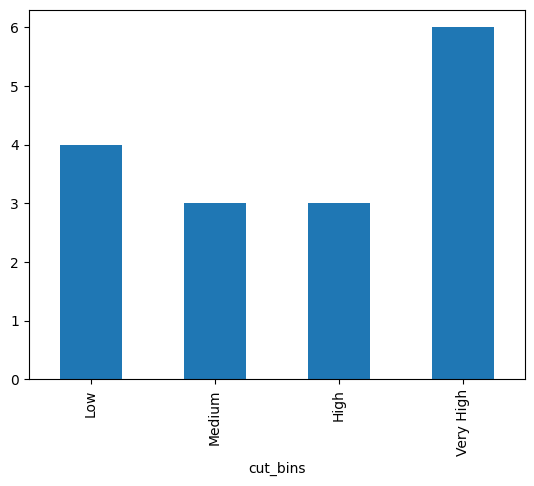

In [ ]:
#@title pd.cut visualization (sorted)
# Using Pandas built-in plot for visualization
df['cut_bins'].value_counts().sort_index().plot(kind='bar')

counts = df['cut_bins'].value_counts()
print(type(counts))
counts_sorted = counts.sort_index()
counts_sorted.plot(kind='bar')


In [ ]:
#@title pd.qcut
import pandas as pd

# Sample data
data = [2, 24, 32, 5, 8, 10, 15, 18, 20, 25, 30, 35]
# add these to the mix
data = [2, 24, 32, 5, 8, 10, 15, 18, 20, 25, 30, 56, 78, 90, 120,35]

df = pd.DataFrame({'values': data})

# Using pd.qcut() to create 4 quantile bins
df['qcut_bins'] = pd.qcut(df['values'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

print(df)


    values qcut_bins
0        2        Q1
1       24        Q2
2       32        Q3
3        5        Q1
4        8        Q1
5       10        Q1
6       15        Q2
7       18        Q2
8       20        Q2
9       25        Q3
10      30        Q3
11      56        Q4
12      78        Q4
13      90        Q4
14     120        Q4
15      35        Q3


<Axes: xlabel='qcut_bins'>

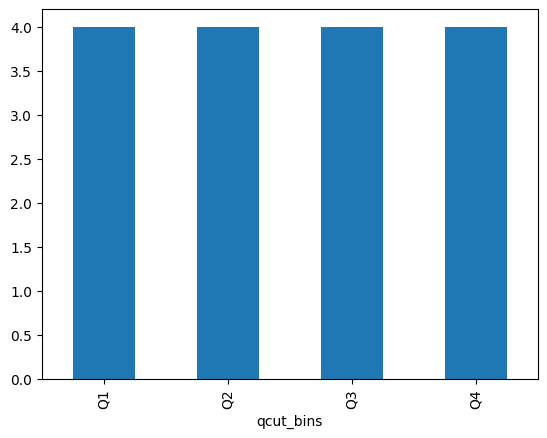

In [ ]:
#@title pd.qcut visualization
# Using Pandas built-in plot for visualization
df['qcut_bins'].value_counts().plot(kind='bar')


##apply with Custom Functions
The apply method can be used to apply a custom function to each group after splitting the data.

In [ ]:
#@title apply (a custom function)
import pandas as pd

# Sample dataset
df = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma', 'Frank', 'Grace', 'Hannah', 'Ian', 'Jack'],
    'age': [22, 25, 47, 51, 35, 60, 42, 55, 28, 33],
    'salary': [3000, 3200, 5800, 6000, 4500, 7000, 5200, 6400, 3100, 4000]
})

display("Original dataframe: ", df)


# Bin ages into categories
df['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70], labels=['20s', '30s', '40s', '50s', '60s'])

display("Binning the data into age_groups based on the age")
display("Dataframe after binning: ", df)


# Custom function for salary statistics
def salary_stats(group):
    return pd.Series({
        'mean_salary': group['salary'].mean(),
        'max_salary': group['salary'].max(),
        'count_salary': group['salary'].count(),
        'min_salary': group['salary'].min()
    })

# Explicitly drop 'age_group' column before applying the function to avoid the warning
# Use include_groups=False to exclude the grouping column automatically
result = df.groupby('age_group', observed=False).apply(salary_stats, include_groups=False)

# Fill NaN values with 0 for groups with no data
result.fillna(0, inplace=True)

# Display result
print(result)


'Original dataframe: '

,name,age,salary
0,Alice,22,3000
1,Bob,25,3200
2,Charlie,47,5800
3,David,51,6000
4,Emma,35,4500
5,Frank,60,7000
6,Grace,42,5200
7,Hannah,55,6400
8,Ian,28,3100
9,Jack,33,4000


'Binning the data into age_groups based on the age'

'Dataframe after binning: '

,name,age,salary,age_group
0,Alice,22,3000,20s
1,Bob,25,3200,20s
2,Charlie,47,5800,40s
3,David,51,6000,50s
4,Emma,35,4500,30s
5,Frank,60,7000,50s
6,Grace,42,5200,40s
7,Hannah,55,6400,50s
8,Ian,28,3100,20s
9,Jack,33,4000,30s


           mean_salary  max_salary  count_salary  min_salary
age_group                                                   
20s        3100.000000      3200.0           3.0      3000.0
30s        4250.000000      4500.0           2.0      4000.0
40s        5500.000000      5800.0           2.0      5200.0
50s        6466.666667      7000.0           3.0      6000.0
60s           0.000000         0.0           0.0         0.0


##transform
The transform method is used to apply a function to each group and return a DataFrame with the same shape as the input. This is useful for group-specific transformations.

In [ ]:
#@title transform (for scaling, normalization)
import pandas as pd

# Sample dataset
df = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma', 'Frank', 'Grace', 'Hannah', 'Ian', 'Jack'],
    'age': [22, 25, 47, 51, 35, 60, 42, 55, 28, 33],
    'salary': [3000, 3200, 5800, 6000, 4500, 7000, 5200, 6400, 3100, 4000]
})

display("Original dataframe: ", df)

# Bin ages into categories
df['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70], labels=['20s', '30s', '40s', '50s', '60s'])


display("Dataframe after binning into different age groups: ", df)

# Define a normalization function: (x - min) / (max - min)
def normalize(x):
    return (x - x.min()) / (x.max() - x.min())

# Apply transform() to normalize salaries within each age group
df['normalized_salary'] = df.groupby('age_group')['salary'].transform(normalize)

# Display the updated DataFrame
display(df[['name', 'age_group','normalized_salary']])
display("Dataframe with normalized salary: ", df)

'Original dataframe: '

,name,age,salary
0,Alice,22,3000
1,Bob,25,3200
2,Charlie,47,5800
3,David,51,6000
4,Emma,35,4500
5,Frank,60,7000
6,Grace,42,5200
7,Hannah,55,6400
8,Ian,28,3100
9,Jack,33,4000


'Dataframe after binning into different age groups: '

,name,age,salary,age_group
0,Alice,22,3000,20s
1,Bob,25,3200,20s
2,Charlie,47,5800,40s
3,David,51,6000,50s
4,Emma,35,4500,30s
5,Frank,60,7000,50s
6,Grace,42,5200,40s
7,Hannah,55,6400,50s
8,Ian,28,3100,20s
9,Jack,33,4000,30s


<ipython-input-51-b573339dfbdf>:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['normalized_salary'] = df.groupby('age_group')['salary'].transform(normalize)


,name,age_group,normalized_salary
0,Alice,20s,0.0
1,Bob,20s,1.0
2,Charlie,40s,1.0
3,David,50s,0.0
4,Emma,30s,1.0
5,Frank,50s,1.0
6,Grace,40s,0.0
7,Hannah,50s,0.4
8,Ian,20s,0.5
9,Jack,30s,0.0


'Dataframe with normalized salary: '

,name,age,salary,age_group,normalized_salary
0,Alice,22,3000,20s,0.0
1,Bob,25,3200,20s,1.0
2,Charlie,47,5800,40s,1.0
3,David,51,6000,50s,0.0
4,Emma,35,4500,30s,1.0
5,Frank,60,7000,50s,1.0
6,Grace,42,5200,40s,0.0
7,Hannah,55,6400,50s,0.4
8,Ian,28,3100,20s,0.5
9,Jack,33,4000,30s,0.0


## filter
The filter method is used to filter groups based on a condition. It returns a subset of the original DataFrame.

In [ ]:
#@title filter
import pandas as pd

# Sample dataset
df = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma', 'Frank', 'Grace', 'Hannah', 'Ian', 'Jack'],
    'age': [22, 25, 47, 51, 35, 60, 42, 55, 28, 33],
    'salary': [3000, 3200, 5800, 6000, 4500, 7000, 5200, 6400, 3100, 4000]
})

# Bin ages into categories
df['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70], labels=['20s', '30s', '40s', '50s', '60s'])

display("Original dataframe: ", df)
# Use filter() to keep only groups where at least one person earns more than $5000
filtered_df = df.groupby('age_group', observed=False).filter(lambda x: (x['salary'] > 5000).any())

# Display the filtered DataFrame
display("Filtered datframe: ", filtered_df)

'Original dataframe: '

,name,age,salary,age_group
0,Alice,22,3000,20s
1,Bob,25,3200,20s
2,Charlie,47,5800,40s
3,David,51,6000,50s
4,Emma,35,4500,30s
5,Frank,60,7000,50s
6,Grace,42,5200,40s
7,Hannah,55,6400,50s
8,Ian,28,3100,20s
9,Jack,33,4000,30s


'Filtered datframe: '

,name,age,salary,age_group
2,Charlie,47,5800,40s
3,David,51,6000,50s
5,Frank,60,7000,50s
6,Grace,42,5200,40s
7,Hannah,55,6400,50s


## melt method
Sometimes, reshaping data is necessary before applying transformations.

melt() helps convert wide data into long format.
pivot() helps reshape it back into the desired format.

In [ ]:
#@title basic melt operation (wide to long)
import pandas as pd

data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Math': [85, 90, 78],
    'Science': [88, 92, 82],
    'English': [89, 85, 88],
    'History': [69, 95, 58]
}

df = pd.DataFrame(data)
display(df)

#@title basic melt (long format)
df_melted = pd.melt(df, id_vars=['Name'], var_name='Subject', value_name='Score')
display(df_melted)



,Name,Math,Science,English,History
0,Alice,85,88,89,69
1,Bob,90,92,85,95
2,Charlie,78,82,88,58


,Name,Subject,Score
0,Alice,Math,85
1,Bob,Math,90
2,Charlie,Math,78
3,Alice,Science,88
4,Bob,Science,92
5,Charlie,Science,82
6,Alice,English,89
7,Bob,English,85
8,Charlie,English,88
9,Alice,History,69


In [ ]:
#@title melt (another example)
import pandas as pd

# Sample dataset
df = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma', 'Frank', 'Grace', 'Hannah', 'Ian', 'Jack'],
    'age': [22, 25, 47, 51, 35, 60, 42, 55, 28, 33],
    'salary': [3000, 3200, 5800, 6000, 4500, 7000, 5200, 6400, 3100, 4000]
})

# Bin ages into categories
df['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70], labels=['20s', '30s', '40s', '50s', '60s'])

# Use filter() to keep only groups where at least one person earns more than $5000
filtered_df = df.groupby('age_group', observed=False).filter(lambda x: (x['salary'] > 5000).any())

# Reshape data using melt()
melted_df = pd.melt(df, id_vars=['name', 'age_group'], value_vars=['age', 'salary'], var_name='Attribute', value_name='Value')

# Display the melted DataFrame
print(melted_df)


       name age_group Attribute  Value
0     Alice       20s       age     22
1       Bob       20s       age     25
2   Charlie       40s       age     47
3     David       50s       age     51
4      Emma       30s       age     35
5     Frank       50s       age     60
6     Grace       40s       age     42
7    Hannah       50s       age     55
8       Ian       20s       age     28
9      Jack       30s       age     33
10    Alice       20s    salary   3000
11      Bob       20s    salary   3200
12  Charlie       40s    salary   5800
13    David       50s    salary   6000
14     Emma       30s    salary   4500
15    Frank       50s    salary   7000
16    Grace       40s    salary   5200
17   Hannah       50s    salary   6400
18      Ian       20s    salary   3100
19     Jack       30s    salary   4000


##stack

pandas.stack is used to pivot a DataFrame from wide format to long format. Specifically, it reshapes the DataFrame by stacking the columns into a multi-level index, resulting in a Series (or DataFrame if the DataFrame has multiple levels of columns). It is commonly used when you want to work with multi-level indexed data or need to reshape wide DataFrames into hierarchical structures.

In [ ]:
#@title set up the dataframe
import pandas as pd

# Sample DataFrame
data = {
    "ID": [1, 2, 3],
    "Name": ["Alice", "Bob", "Charlie"],
    "Math": [85, 90, 78],
    "Science": [92, 88, 84],
    "English": [88, 76, 95]
}

df = pd.DataFrame(data)

display(df)


,ID,Name,Math,Science,English
0,1,Alice,85,92,88
1,2,Bob,90,88,76
2,3,Charlie,78,84,95


In [ ]:
#@title Stack the DataFrame
stacked = df.set_index("Name").stack()

display(stacked)

Name            
Alice    ID          1
         Math       85
         Science    92
         English    88
Bob      ID          2
         Math       90
         Science    88
         English    76
Charlie  ID          3
         Math       78
         Science    84
         English    95
dtype: int64

##crosstab

pandas.crosstab is a function used to compute a cross-tabulation of two or more factors (columns or series). It provides a summary (like a pivot table) of the frequency distribution between rows and columns. This is especially useful for summarizing categorical data.

In [ ]:
#@title crosstab: basic frequency count
import pandas as pd

# Sample data
data = {
    "Gender": ["Male", "Female", "Female", "Male", "Male", "Female"],
    "Preference": ["Sports", "Music", "Music", "Sports", "Music", "Sports"]
}

df = pd.DataFrame(data)
display(df)

# Crosstabulation of Gender and Preference
crosstab = pd.crosstab(df["Gender"], df["Preference"])
print(type(crosstab))
display(crosstab)



,Gender,Preference
0,Male,Sports
1,Female,Music
2,Female,Music
3,Male,Sports
4,Male,Music
5,Female,Sports


<class 'pandas.core.frame.DataFrame'>


Preference,Music,Sports
Gender,,
Female,2,1
Male,1,2


In [ ]:
#@title crosstab: Aggregation with values and aggfunc
# Sample data with numerical values
data = {
    "Gender": ["Male", "Female", "Female", "Male", "Male", "Female"],
    "Preference": ["Sports", "Music", "Music", "Sports", "Music", "Sports"],
    "Age": [20, 25, 30, 22, 28, 19]
}

df = pd.DataFrame(data)

# Sum the ages for each combination of Gender and Preference
crosstab = pd.crosstab(df["Gender"], df["Preference"], values=df["Age"], aggfunc="mean")

print(crosstab)


Preference  Music  Sports
Gender                   
Female       27.5    19.0
Male         28.0    21.0


In [ ]:
#@title crosstab: Adding totals with margins
# Add row and column totals
crosstab = pd.crosstab(df["Gender"], df["Preference"], margins=True)

print(crosstab)


Preference  Music  Sports  All
Gender                        
Female          2       1    3
Male            1       2    3
All             3       3    6


In [ ]:
#@title Multi-Index Cross Tab
# Adding another factor
data = {
    "Gender": ["Male", "Female", "Female", "Male", "Male", "Female"],
    "Preference": ["Sports", "Music", "Music", "Sports", "Music", "Sports"],
    "Region": ["North", "North", "South", "South", "North", "South"]
}

df = pd.DataFrame(data)

# Crosstab with multiple factors
crosstab = pd.crosstab([df["Gender"], df["Region"]], df["Preference"])

print(crosstab)


Preference     Music  Sports
Gender Region               
Female North       1       0
       South       1       1
Male   North       1       1
       South       0       1
